In [6]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import os
import pickle
import re
from datetime import datetime as dt

from tqdm import tqdm
from tqdm import tnrange
from tqdm import tqdm_notebook

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm
import statsmodels.api as sm
from pandas.tools.plotting import autocorrelation_plot
from dateutil.relativedelta import relativedelta
from datetime import datetime as dt
from datetime import timedelta

from sklearn import cross_validation, grid_search, linear_model, metrics, pipeline, preprocessing

In [7]:
with open('hourly_data.pkl', 'rb') as f:
    data_df = pickle.load(f)

### With Prophet

In [8]:
# Python
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [59]:
df1 = data_df.Count.resample('W').sum()
df = df1.copy()
df = data_df.Count

In [60]:
df = df.reset_index()
df = df.rename(columns={'Time': 'ds', 'Count': 'y'})
df.head()

,ds,y
0,2015-01-01 00:00:00,4
1,2015-01-01 01:00:00,3
2,2015-01-01 02:00:00,1
3,2015-01-01 03:00:00,0
4,2015-01-01 04:00:00,1


In [61]:
# df.loc[df.TempC.isna(), 'TempC'] = df.TempC.mean()

In [62]:
m = Prophet(interval_width=0.95)
# m.add_regressor('TempC')
m.fit(df);

/home/cneiderer/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [63]:
# future = m.make_future_dataframe(periods=52*3, freq='w')
future = m.make_future_dataframe(periods=52*3, freq='w')
# future_temp = np.random.uniform(df.TempC.min(), df.TempC.max(), size=future.shape)
# future['TempC'] = future_temp
future.tail()

,ds
26455,2020-11-29 23:00:00
26456,2020-12-06 23:00:00
26457,2020-12-13 23:00:00
26458,2020-12-20 23:00:00
26459,2020-12-27 23:00:00


In [64]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26455,2020-11-29 23:00:00,136.199338,-88.797398,380.180858
26456,2020-12-06 23:00:00,119.290465,-133.923399,377.861338
26457,2020-12-13 23:00:00,104.027299,-161.004210,334.933726
26458,2020-12-20 23:00:00,89.916222,-179.427886,351.761434
26459,2020-12-27 23:00:00,80.134324,-167.133142,320.008894


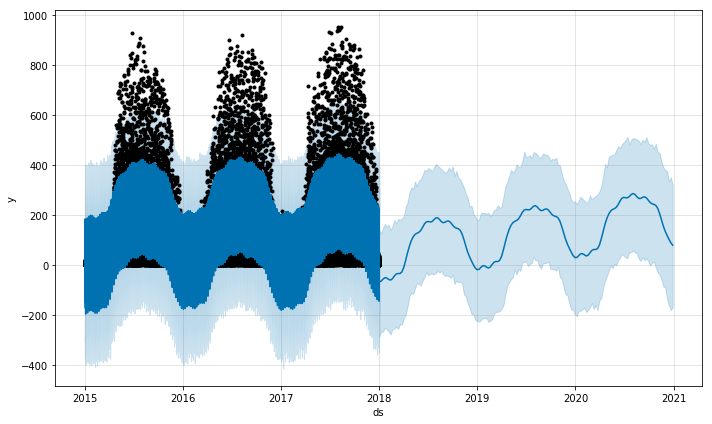

In [65]:
m.plot(forecast);

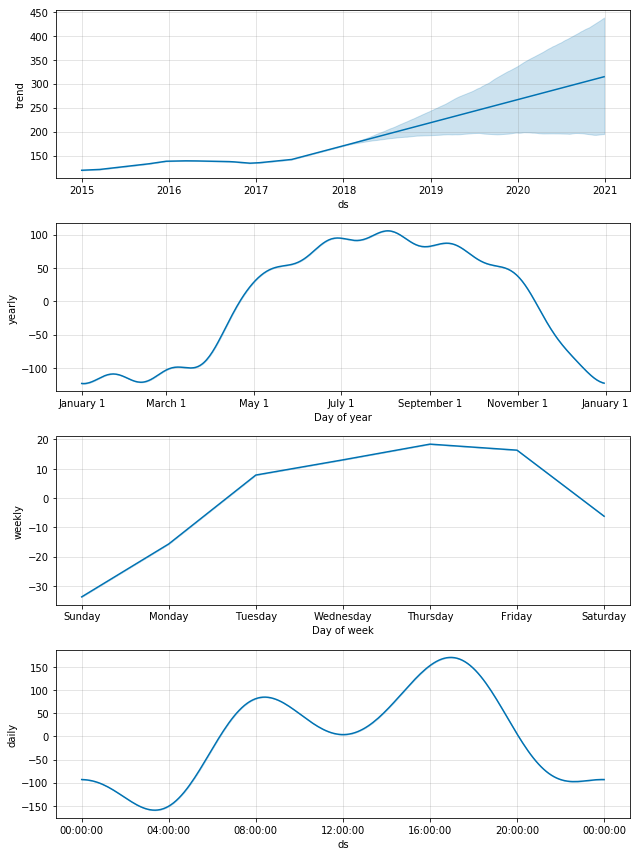

In [66]:
fig = m.plot_components(forecast);

In [54]:
forecast_data = forecast.set_index('ds')
# forecast_data = forecast_data[forecast_data.index.date > (dt(2018, 1, 1).date())]

In [55]:
forecast_data

,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
ds,,,,,,,,,,,,,,,
2015-01-04,20453.407508,20453.407508,20453.407508,-6473.726572,7068.843650,-20423.898952,-20423.898952,-20423.898952,-20423.898952,-20423.898952,-20423.898952,-20423.898952,-20423.898952,-20423.898952,29.508556
2015-01-11,20488.015649,20488.015649,20488.015649,-6742.899557,6330.850381,-20541.727137,-20541.727137,-20541.727137,-20541.727137,-20541.727137,-20541.727137,-20541.727137,-20541.727137,-20541.727137,-53.711488
2015-01-18,20522.623790,20522.623790,20522.623790,-5690.742807,7956.091152,-19537.282430,-19537.282430,-19537.282430,-19537.282430,-19537.282430,-19537.282430,-19537.282430,-19537.282430,-19537.282430,985.341360
2015-01-25,20557.231930,20557.231930,20557.231930,-5343.708997,8592.391506,-18672.601542,-18672.601542,-18672.601542,-18672.601542,-18672.601542,-18672.601542,-18672.601542,-18672.601542,-18672.601542,1884.630389
2015-02-01,20591.840071,20591.840071,20591.840071,-5372.999406,8287.809938,-18963.366461,-18963.366461,-18963.366461,-18963.366461,-18963.366461,-18963.366461,-18963.366461,-18963.366461,-18963.366461,1628.473610
2015-02-08,20626.448212,20626.448212,20626.448212,-6401.816690,7487.863789,-20103.669936,-20103.669936,-20103.669936,-20103.669936,-20103.669936,-20103.669936,-20103.669936,-20103.669936,-20103.669936,522.778276
2015-02-15,20661.056352,20661.056352,20661.056352,-7222.648531,7109.909493,-20749.201897,-20749.201897,-20749.201897,-20749.201897,-20749.201897,-20749.201897,-20749.201897,-20749.201897,-20749.201897,-88.145545
2015-02-22,20695.664493,20695.664493,20695.664493,-6439.667730,7509.082637,-19964.019786,-19964.019786,-19964.019786,-19964.019786,-19964.019786,-19964.019786,-19964.019786,-19964.019786,-19964.019786,731.644707
2015-03-01,20730.272633,20730.272633,20730.272633,-3990.376499,8677.706107,-18262.167420,-18262.167420,-18262.167420,-18262.167420,-18262.167420,-18262.167420,-18262.167420,-18262.167420,-18262.167420,2468.105213


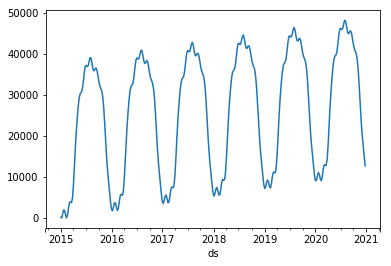

In [56]:
forecast_data[['trend', 'yearly']].sum(axis=1).plot()

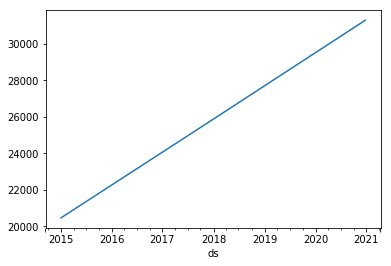

In [57]:
forecast_data.trend.plot()

In [52]:
test = forecast_data.reset_index()
test['Year'] = forecast_data.index.year
test['Month'] = forecast_data.index.month

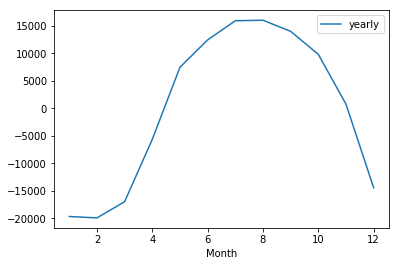

In [53]:
test[['Month', 'yearly']].groupby('Month').mean().plot()